## Učitavanje procesiranih podataka

In [ ]:
import pandas as pd

df = pd.read_pickle(r"C:\Users\Lenovo PC\Desktop\detekcija_prevara_u_transakcijama\data\processed_data.pkl")

# Random Forest + SMOTE

In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report, 
                           average_precision_score, precision_recall_curve)
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import joblib
import os

In [ ]:
os.makedirs('models', exist_ok=True)

## Podjela

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## SMOTE

In [12]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Random Forest

In [13]:
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

## Evaluacija


Average Precision Score: 0.8678


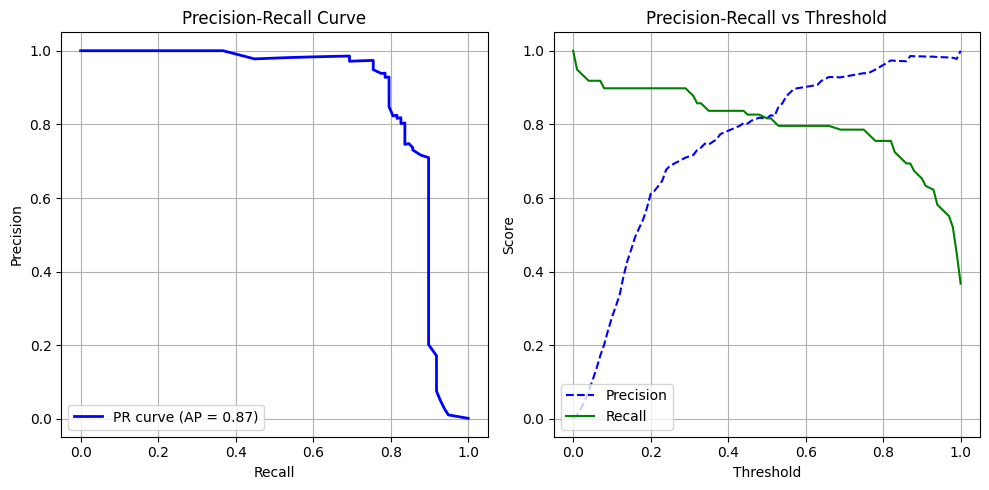


Confusion Matrix:
[[56847    17]
 [   18    80]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8247    0.8163    0.8205        98

    accuracy                         0.9994     56962
   macro avg     0.9122    0.9080    0.9101     56962
weighted avg     0.9994    0.9994    0.9994     56962



In [14]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.savefig('models/random_forest_pr_curves.png')  # Save the plot
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
report = classification_report(y_test, y_pred, digits=4)
print(report)

In [ ]:
joblib.dump(model, 'models/random_forest_model.pkl')
with open('models/random_forest_report.txt', 'w') as f:
    f.write(report)

#  XGBoost + SMOTE

In [16]:
import xgboost as xgb

## SMOTE

In [17]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=100, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

c:\Users\amers\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

## Evaluacija


Average Precision Score: 0.8620


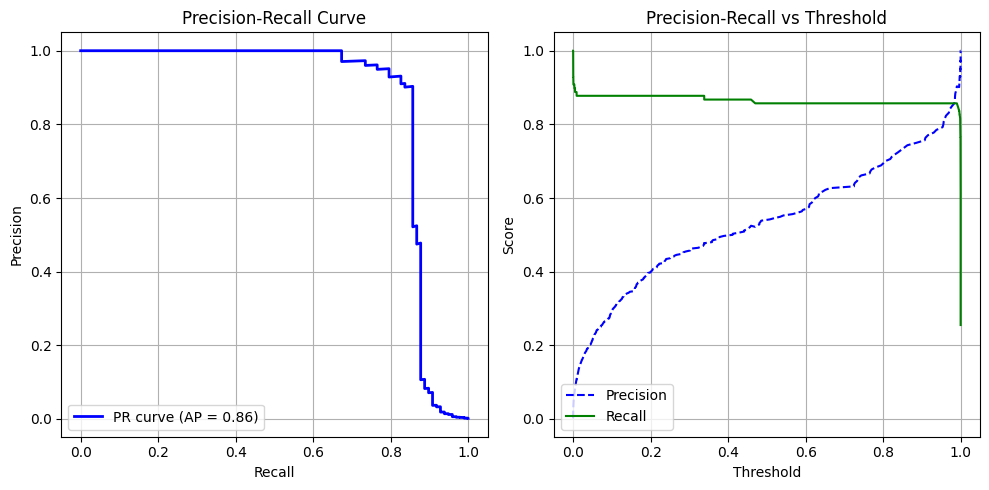


Confusion Matrix:
[[56793    71]
 [   14    84]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9988    0.9993     56864
           1     0.5419    0.8571    0.6640        98

    accuracy                         0.9985     56962
   macro avg     0.7708    0.9279    0.8316     56962
weighted avg     0.9990    0.9985    0.9987     56962



In [18]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()
plt.savefig('models/xgboost_pr_curves.png')  # Save the plot
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
report = classification_report(y_test, y_pred, digits=4)
print(report)

In [ ]:
joblib.dump(model, 'models/xgboost_model.pkl')
with open('models/xgboost_report.txt', 'w') as f:
    f.write(report)

## Logistic Regression + SMOTE

In [20]:
from sklearn.linear_model import LogisticRegression

## Logistic Regression

In [21]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_resampled, y_train_resampled)

LogisticRegression(class_weight='balanced', max_iter=1000)

## Evaluacija


Average Precision Score: 0.7250


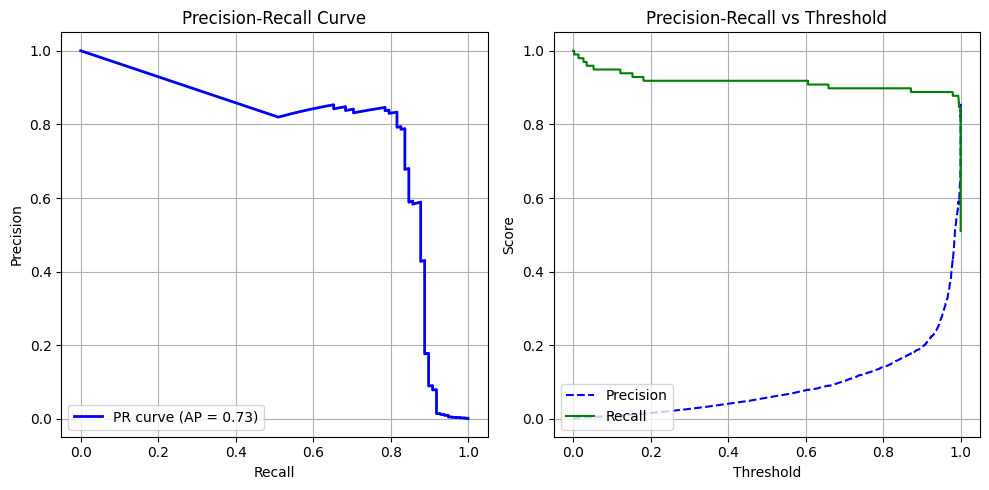


Confusion Matrix:
[[55403  1461]
 [    8    90]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0     0.9999    0.9743    0.9869     56864
           1     0.0580    0.9184    0.1092        98

    accuracy                         0.9742     56962
   macro avg     0.5289    0.9463    0.5480     56962
weighted avg     0.9982    0.9742    0.9854     56962



In [22]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Vjerojatnoca klase 1

ap_score = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision Score: {ap_score:.4f}")

precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='blue', lw=2, 
         label=f'PR curve (AP = {ap_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
plt.plot(thresholds, recall[:-1], 'g-', label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision-Recall vs Threshold')
plt.legend(loc="lower left")
plt.grid(True)

plt.tight_layout()

plt.savefig('models/logistic_regression_pr_curves.png')  # Save the plot
plt.show()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nDetailed Classification Report:")
report = classification_report(y_test, y_pred, digits=4)
print(report)

In [ ]:
joblib.dump(model, 'models/logistic_regression_model.pkl')
with open('models/logistic_regression_report.txt', 'w') as f:
    f.write(report)

In [24]:
print(df.columns)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'Amount_scaled', 'Time_scaled'],
      dtype='object')


In [25]:
from sklearn.preprocessing import StandardScaler
scaler_amount = StandardScaler().fit(X_train[['Amount_scaled']])
scaler_time = StandardScaler().fit(X_train[['Time_scaled']])
joblib.dump(scaler_amount, 'models/scaler_amount.pkl')
joblib.dump(scaler_time, 'models/scaler_time.pkl')

['models/scaler_time.pkl']